# Visualising an images colour space

Imports and loading image below

In [1]:
from PIL import Image
from pillow_heif import register_heif_opener
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

register_heif_opener()

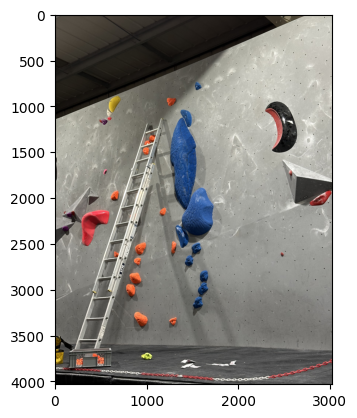

In [2]:
image = Image.open('../images/IMG_1263.HEIC')
np_img = np.asarray(image)

plt.imshow(np_img)

## RGB Colour space 3D Scatter plot

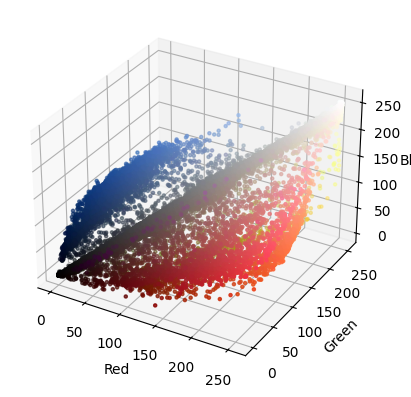

In [3]:
np_img_half = cv.resize(np_img, (0, 0), fx = 0.1, fy = 0.1)

r, g, b = cv.split(np_img_half)

pixel_colors = np_img_half.reshape((np.shape(np_img_half)[0]*np.shape(np_img_half)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# HSV colour space 3D scatter plot

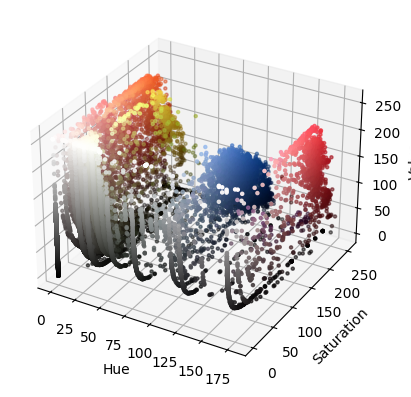

In [4]:
hsv = cv.cvtColor(np_img, cv.COLOR_RGB2HSV)
hsv_half = cv.resize(hsv, (0, 0), fx = 0.1, fy = 0.1)

h, s, v = cv.split(hsv_half)
fig = plt.figure()

axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()